## This task is based on dataset 
https://www.kaggle.com/datasets/thedevastator/medical-student-mental-health
## It is made by Tilman Gabriel and Nazar Stegmann

In [5]:
%pip install pandas
%pip install StandardScaler            
%pip install matplotlib 
%pip install seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, model_selection, preprocessing, metrics

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd


df = pd.read_csv('data/Data.csv')
df.dropna(inplace=True) # Drop missing values


# Display the first few rows of the dataset
print(df.head())

# display the shape of the dataset
print(f"Shape of the dataset: {df.shape}")


# Display the summary statistics of the dataset
print("Summary statistics of the dataset:")
print(df.describe())

# Count missing values in each column
print("Missing values in each column: ", df.isnull().sum())
print("Missing values in total: ", df.isnull().sum().sum())

# Column    name 	                                                                    Description
# age 	    Age of the participant.                                                     (Integer)
# year 	    Year of study of the participant.                                           (Integer)
# sex 	    Gender of the participant.                                                  (String)
# glang 	Language spoken by the participant.                                         (String)
# job 	    Job of the participant.                                                     (String)
# stud_h 	Hours of study per week of the participant.                                 (Integer)
# health 	Self-reported health status of the participant.                             (String)
# psyt 	    Psychological distress score of the participant.                            (Integer)
# jspe 	    Job satisfaction score of the participant.                                  (Integer)
# qcae_cog 	Cognitive empathy score of the participant.                                 (Integer)
# qcae_aff 	Affective empathy score of the participant.                                 (Integer)
# amsp 	    Academic motivation score of the participant.                               (Integer)
# erec_mean Empathy rating score mean of the participant.                               (Integer)
# cesd 	    Center for Epidemiologic Studies Depression scale of the participant.       (Integer)
# stai_t 	State-Trait Anxiety Inventory scale of the participant.                     (Integer)
# mbi_ex 	Maslach Burnout Inventory-Exhaustion scale of the participant.              (Integer)
# mbi_cy 	Maslach Burnout Inventory - Cynicism Scale of the participant.              (Integer)
# mbi_ea 	Maslach Burnout Inventory - Profeh-ssional Efficacy Scale of the participant. (Integer)

   id  age  year  sex  glang  part  job  stud_h  health  psyt  jspe  qcae_cog  \
0   2   18     1    1    120     1    0      56       3     0    88        62   
1   4   26     4    1      1     1    0      20       4     0   109        55   
2   9   21     3    2      1     0    0      36       3     0   106        64   
3  10   21     2    2      1     0    1      51       5     0   101        52   
4  13   21     3    1      1     1    0      22       4     0   102        58   

   qcae_aff  amsp  erec_mean  cesd  stai_t  mbi_ex  mbi_cy  mbi_ea  
0        27    17   0.738095    34      61      17      13      20  
1        37    22   0.690476     7      33      14      11      26  
2        39    17   0.690476    25      73      24       7      23  
3        33    18   0.833333    17      48      16      10      21  
4        28    21   0.690476    14      46      22      14      23  
Shape of the dataset: (886, 20)
Summary statistics of the dataset:
                id         age  

Visualization of the Data

Correlation matrix:
                 id       age      year       sex     glang      part  \
id         1.000000 -0.015575 -0.017308  0.009421 -0.022209  0.020932   
age       -0.015575  1.000000  0.592530 -0.072708  0.030363  0.187294   
year      -0.017308  0.592530  1.000000 -0.057285 -0.101388  0.146825   
sex        0.009421 -0.072708 -0.057285  1.000000  0.005641  0.000315   
glang     -0.022209  0.030363 -0.101388  0.005641  1.000000 -0.049970   
part       0.020932  0.187294  0.146825  0.000315 -0.049970  1.000000   
job       -0.013165  0.226448  0.216636  0.020879 -0.050746  0.047603   
stud_h     0.008610 -0.293557 -0.521473 -0.013806  0.063462 -0.103950   
health     0.002591 -0.029800  0.084023 -0.087907 -0.013567  0.077115   
psyt      -0.034088  0.015278  0.000861  0.158262 -0.042818  0.026840   
jspe      -0.043873  0.223221  0.301176  0.125781 -0.094676  0.122091   
qcae_cog   0.036164  0.059355  0.076645  0.115706 -0.071495  0.040388   
qcae_aff  -0.025341 -0.008130  

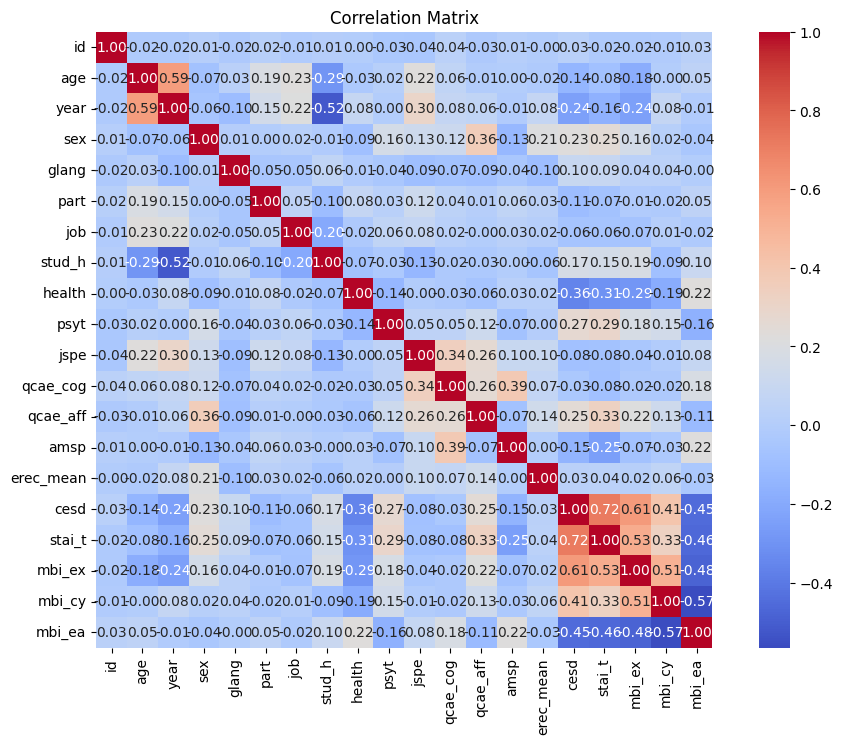

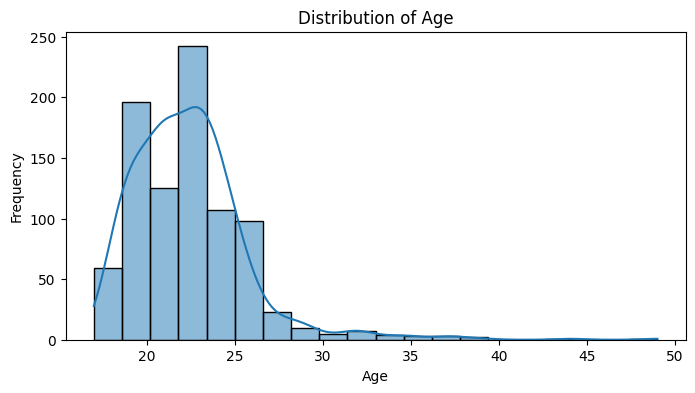

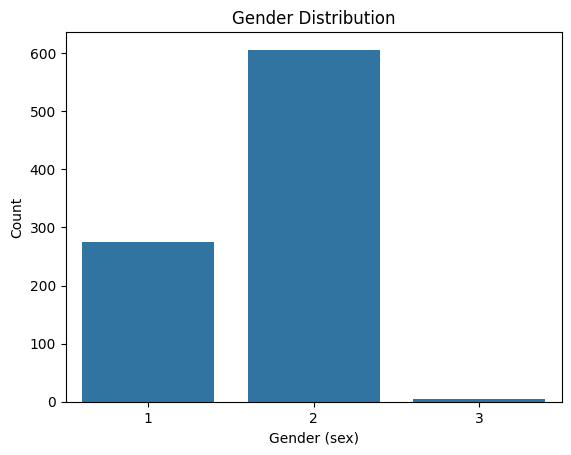

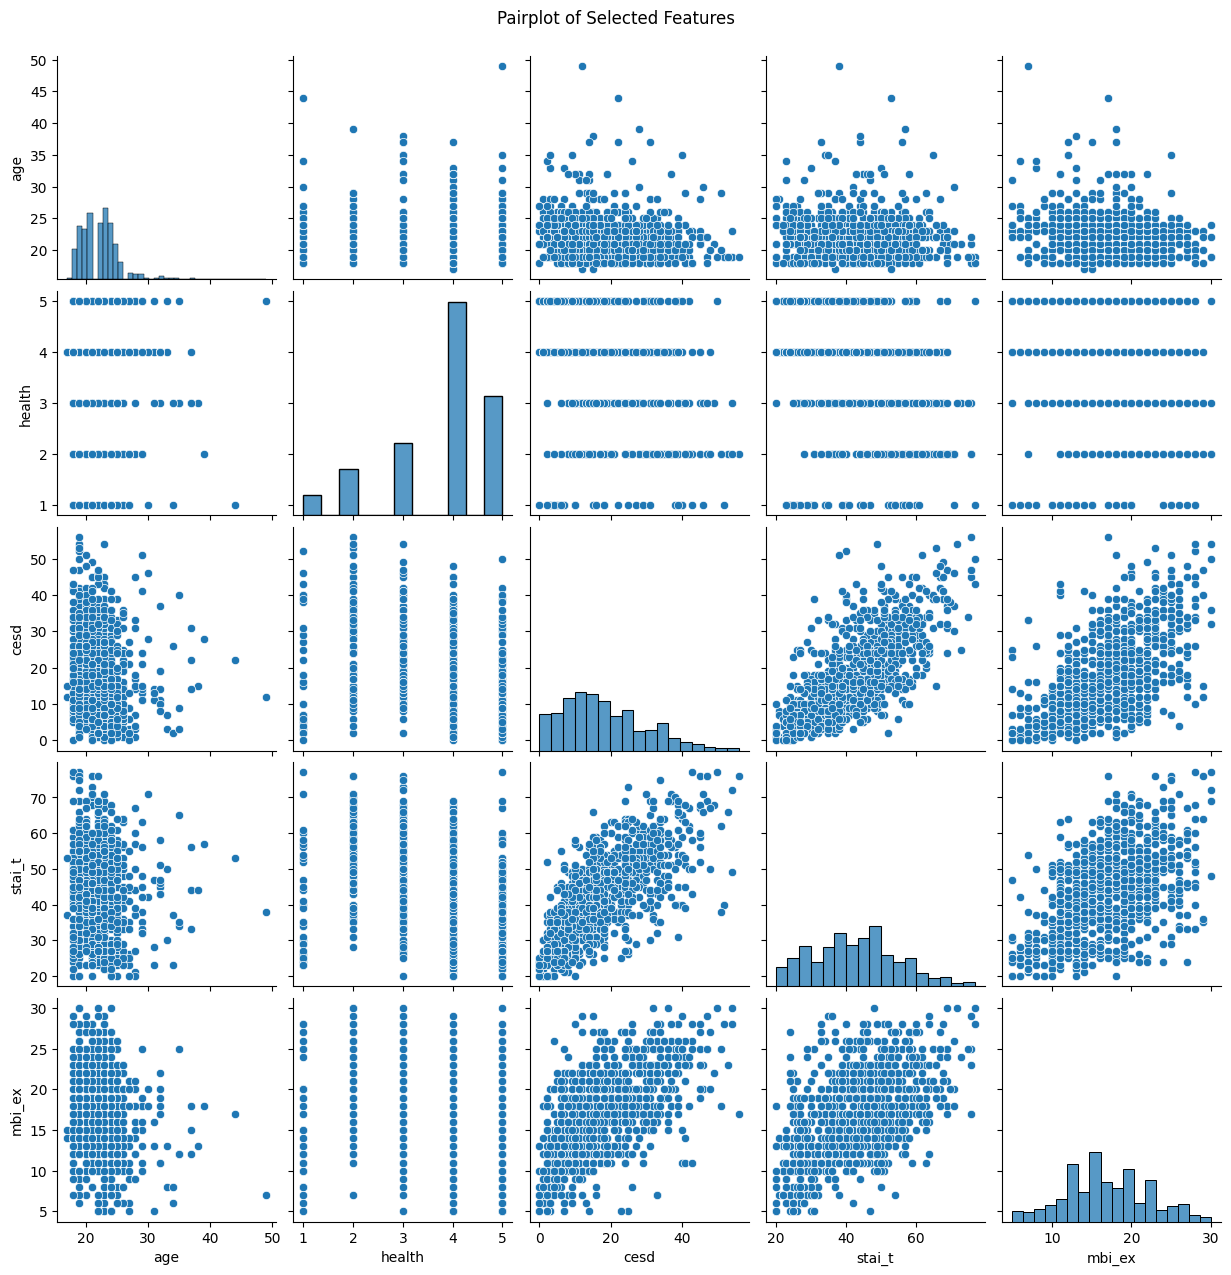

In [7]:
# exploratory data analysis (EDA) on the dataset using:
#statistical summaries and visualizations to understand the distribution of variables, relationships between them, and any potential outliers.


# Basic analysis
print("Correlation matrix:")
print(df.corr())
# shows the correlation between different features in the dataset.
# Strongly positiv or negatively correlated features can be identified, 
# which may indicate multicollinearity or potential relationships worth exploring further.

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

# Visualizations

# 1. Distribution of Age
plt.figure(figsize=(8, 4))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### Count of Age per Year remove # if needed
# print("Age counts:")
# print(df['age'].value_counts().sort_index())

# 2. Barplot of Gender Distribution
sns.countplot(x='sex', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender (sex)')
plt.ylabel('Count')
plt.show()

# 4. Pairplot for selected columns
selected_cols = ['age', 'health', 'cesd', 'stai_t', 'mbi_ex']
sns.pairplot(df[selected_cols])
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

Do PCA on the dataset 

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn import metrics
from scipy.cluster.hierarchy import linkage, dendrogram
import seaborn as sns

# 1. Preprocess data using z-transformation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[selected_cols])

# 2. KMeans clustering with silhouette analysis
silhouette_scores = []
k_range = range(2, 6)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = metrics.silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

best_k = k_range[silhouette_scores.index(max(silhouette_scores))]
print(f"Best k: {best_k} with silhouette score: {max(silhouette_scores):.3f}")

# Fit KMeans with best k
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)

# 3. Visualize KMeans clustering using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab10', alpha=0.7)
plt.title('KMeans Clustering (PCA-reduced)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(scatter, label='Cluster')
plt.show()

# 4. Hierarchical clustering and dendrogram
linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(linked, truncate_mode='level', p=10)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# 5. Heatmap with clustering
sns.clustermap(df[selected_cols], standard_scale=1, cmap='vlag', figsize=(10, 8))
plt.title('Clustered Heatmap')
plt.show()

# 6. Density-based clustering (DBSCAN)
dbscan = DBSCAN(eps=1.0, min_samples=5)
db_labels = dbscan.fit_predict(X_scaled)
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=db_labels, cmap='tab10', alpha=0.7)
plt.title('DBSCAN Clustering (PCA-reduced)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(scatter, label='Cluster')
plt.show()

print("Code successfully executed.")

Perform a Linear regression Model on the selected Variables

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Choose target variable: 'cesd', 'stai_t', or 'mbi_ex'
target = 'cesd'  # Change to 'stai_t' or 'mbi_ex' as needed

# Use all other numeric columns except the target as features
features = [col for col in df.select_dtypes(include=[np.number]).columns if col != target]

#reduce the number of features to 10 # Codejunk to reduce the number of features to 10 and rise the accuracy?
#features = features[:10]

X = df[features]
y = df[target]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict on test set
y_pred = lr.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression for {target}")
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
print("Coefficients:")
for feat, coef in zip(features, lr.coef_):
    print(f"{feat}: {coef:.4f}")
print("Intercept:", lr.intercept_)

# Visualize the coefficients
plt.figure(figsize=(10, 6))
plt.barh(features, lr.coef_)
plt.xlabel('Coefficient Value')
plt.title(f'Linear Regression Coefficients for {target}')
plt.show()

# Visualize thre regression line
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title(f'Linear Regression Predictions for {target}')
plt.show()
